# Лабораторная работа №1
# Анализ данных на основе регрессионых моделей

## Загрузка библиотек и пакетов

In [50]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import set_option
from pandas.plotting import scatter_matrix
from pickle import dump
%matplotlib inline
import matplotlib.pyplot as plt


## Загрузка данных
Удалим столбец Unnamed, если он есть в выборке

In [51]:
STARTUP_PATH = "v3.csv"
def load_startup_data(startup_path = STARTUP_PATH):
    return pd.read_csv(startup_path)
startup = load_startup_data()
if "Unnamed: 0" in startup.columns:
    startup = startup.drop("Unnamed: 0", axis=1)


## Разведочный анализ

### Ознакомление с данными при помощи методов описательной статистики
Посмотрим, какие есть столбцы

In [52]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,NaN,407934.54,Florida,191050.39
3,144372.41,NaN,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Узнаем типы данных выборки и ее размер

In [53]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   27 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Заметим, что больше половины значений поля "Administration" не заполнены, поэтому рационально удалить этот столбец

In [54]:
startup.drop(["Administration"], axis=1, inplace=True)

Посмотрим, какие существуют категории

In [55]:
startup["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

Узнаем характеристики выборок

In [56]:
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
startup.describe()

,R&D Spend,Marketing Spend,Profit
count,50.00,50.00,50.00
mean,73721.62,211025.10,112012.64
std,45902.26,122290.31,40306.18
min,0.00,0.00,14681.40
25%,39936.37,129300.13,90138.90
50%,73051.08,212716.24,107978.19
75%,101602.80,299469.08,139765.98
max,165349.20,471784.10,192261.83


### Одномерная визуализация данных

Построим гистограммы для численных признаков

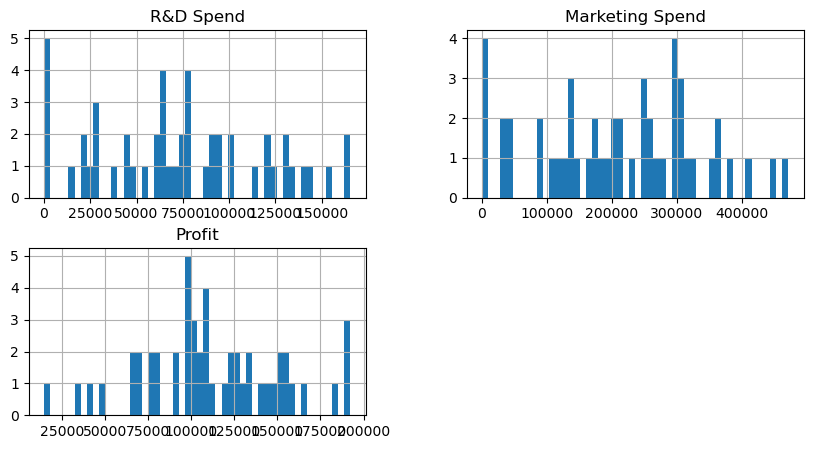

In [57]:
RnD_spend = startup["R&D Spend"]
marketing = startup["Marketing Spend"]
Profit = startup.Profit
substartup = pd.DataFrame({"R&D Spend": RnD_spend,
                             "Marketing Spend":marketing,
                           "Profit": Profit})
substartup.hist(bins=50, figsize=(10,5))
plt.show()

Построим графики плотности

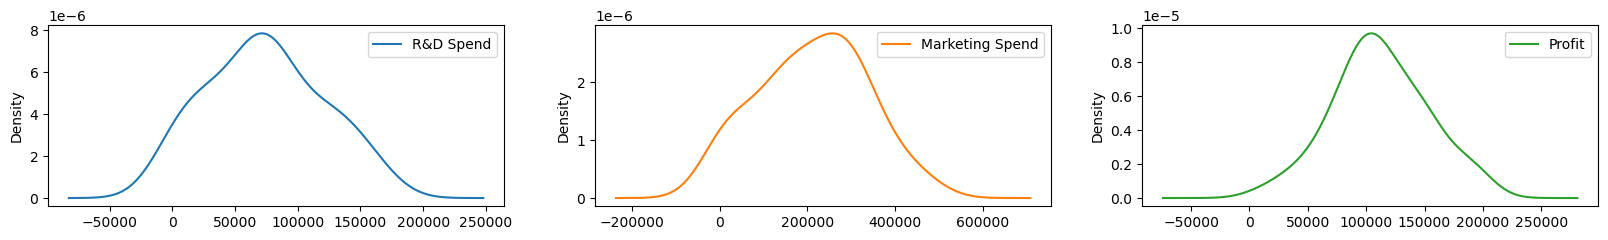

In [58]:
substartup.plot(kind='density', subplots=True, layout=(3,3),sharex=False, legend=True, figsize=(20,8))
plt.show()

### Многомерная визуализация данных
Построим матрицу корреляция

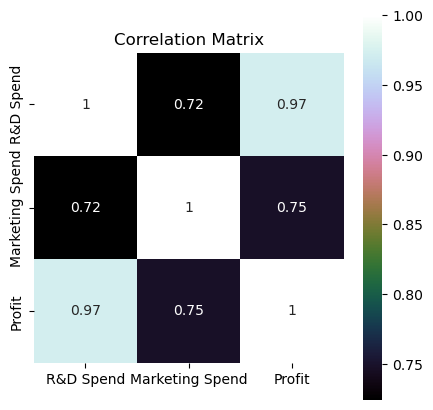

In [59]:
correlation = substartup.corr()
plt.figure(figsize=(5,5))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.show()

Построим диаграмму расеяния

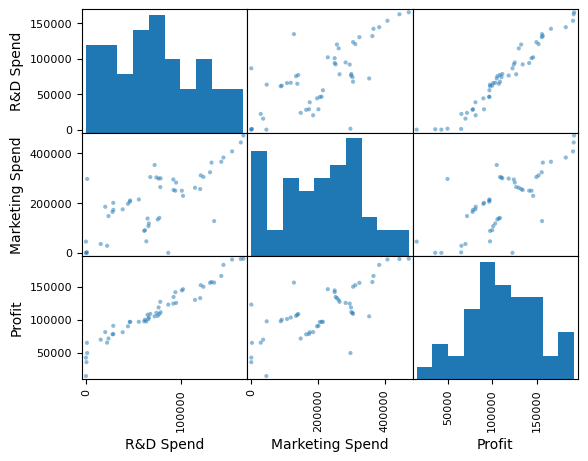

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(startup)
plt.show()

### Преобразование категориальных признаков
Преобразуем категориальный признак в отдельные бинарные признаки для каждой категории

In [61]:
startup_encoded = pd.get_dummies(startup, columns=['State'], drop_first=True)

### Поиск корреляционной зависимости
Выполним корреляционный анализ

In [62]:
corr_matrix = startup_encoded.corr()
corr_matrix

,R&D Spend,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.00,0.72,0.97,0.11,0.04
Marketing Spend,0.72,1.00,0.75,0.21,-0.03
Profit,0.97,0.75,1.00,0.12,0.03
State_Florida,0.11,0.21,0.12,1.00,-0.49
State_New York,0.04,-0.03,0.03,-0.49,1.00


In [63]:
corr_matrix["Profit"].sort_values(ascending=False)

Profit            1.00
R&D Spend         0.97
Marketing Spend   0.75
State_Florida     0.12
State_New York    0.03
Name: Profit, dtype: float64

### Создание новых признаков
Создадим больше признаков для корреляционного анализа

In [64]:
startup_encoded["Total Spend"] = (
    startup_encoded["R&D Spend"] +
    startup_encoded["Marketing Spend"]
)
startup_encoded["RnD_Ratio"] = startup_encoded["R&D Spend"] / startup_encoded["Total Spend"]
startup_encoded["Marketing_Ratio"] = startup_encoded["Marketing Spend"] / startup_encoded["Total Spend"]
startup_encoded["RnD_vs_Marketing"] = startup_encoded["R&D Spend"] - startup_encoded["Marketing Spend"]
startup_encoded["Average_Spend"] = startup_encoded["Total Spend"] / 3
startup_encoded["RnD_x_Marketing"] = startup_encoded["R&D Spend"] * startup_encoded["Marketing Spend"]
startup_encoded["High_RnD"] = (startup_encoded["R&D Spend"] > 100000).astype(int)

corr_matrix = startup_encoded.corr()

In [65]:

corr_matrix["Profit"].sort_values(ascending=False)

Profit              1.00
R&D Spend           0.97
RnD_x_Marketing     0.88
Total Spend         0.86
Average_Spend       0.86
High_RnD            0.76
Marketing Spend     0.75
State_Florida       0.12
RnD_Ratio           0.04
State_New York      0.03
Marketing_Ratio    -0.04
RnD_vs_Marketing   -0.50
Name: Profit, dtype: float64

Заметим, что такие признаки как штат, отношение затрат на RnD и Маркетинг, а также разница трат на Rnd и Маркетинг имеют низкую корреляцию

## Подготовка данных
### Очистка данных
Очистим признаки, которые имеют низкую корреляцию

In [66]:
startup_encoded.drop(
    [ "RnD_vs_Marketing","State_New York", "State_Florida", "Marketing_Ratio", "RnD_Ratio"],
    axis=1,
    inplace=True
)


In [67]:
corr_matrix = startup_encoded.corr()
corr_matrix["Profit"].sort_values(ascending=False)

Profit            1.00
R&D Spend         0.97
RnD_x_Marketing   0.88
Total Spend       0.86
Average_Spend     0.86
High_RnD          0.76
Marketing Spend   0.75
Name: Profit, dtype: float64

## Отбор признаков

In [77]:
selected_columns = [
    "R&D Spend", "Marketing Spend", "RnD_x_Marketing",
    "Total Spend", "Average_Spend", "High_RnD"
]
startup_X = startup_encoded[selected_columns]
startup_Y = startup_encoded["Profit"]

,R&D Spend,Marketing Spend,RnD_x_Marketing,Total Spend,Average_Spend,High_RnD
0,165349.20,471784.10,78009123507.72,637133.30,212377.77,1
1,162597.70,443898.53,72176880011.38,606496.23,202165.41,1
2,153441.51,407934.54,62594091798.76,561376.05,187125.35,1
3,144372.41,383199.62,55323452650.48,527572.03,175857.34,1
4,142107.34,366168.42,52035220158.20,508275.76,169425.25,1
5,131876.90,362861.36,47853031286.58,494738.26,164912.75,1
6,134615.46,127716.82,17192658474.04,262332.28,87444.09,1
7,130298.13,323876.68,42200525754.61,454174.81,151391.60,1
8,120542.52,311613.29,37562651242.09,432155.81,144051.94,1
9,123334.88,304981.62,37614871504.91,428316.50,142772.17,1


## Норма